In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#note: all outputs until average calculations are data manipulation and cleanup

In [2]:
#loading data set, showing names of columns for replacement:
url = 'https://raw.githubusercontent.com/askidelsky/DAV-6150/main/Data%20Sets/Module%202/M2_Data.csv'
cars = pd.read_csv(url)
cars.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.6', '168.8', '64.1', '48.8', '2548', 'dohc', 'four', '130',
       'mpfi', '3.47', '2.68', '9', '111', '5000', '21', '27', '13495'],
      dtype='object')

In [3]:
#assigning column names:
cars = cars.rename(columns = {'3':'symboling','?':'normalized-losses','alfa-romero':'make','gas':'fuel-type','std':'aspiration',
                       'two':'num-of-doors','convertible':'body-style','rwd':'drive-wheels','front':'engine-location',
                      '88.6':'wheel-base','168.8':'length','64.1':'width','48.8':'height','2548':'curb-weight',
                      'dohc':'engine-type','four':'num-of-cylinders','130':'engine-size','mpfi':'fuel-system',
                      '3.47':'bore','2.68':'stroke','9':'compression-ratio','111':'horsepower','5000':'peak-rpm',
                      '21':'city-mpg','27':'highway-mpg','13495':'price'})
cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
#creating subset of only specified variables:
cars = cars[['height', 'width', 'length', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg']]
cars.columns

Index(['height', 'width', 'length', 'wheel-base', 'engine-size', 'horsepower',
       'peak-rpm', 'city-mpg'],
      dtype='object')

In [5]:
#showing data types for each field:
types = {}
for i in range(len(cars.columns)):
    types[cars.columns[i]] = type(cars.iloc[0,i])
types

{'height': numpy.float64,
 'width': numpy.float64,
 'length': numpy.float64,
 'wheel-base': numpy.float64,
 'engine-size': numpy.int64,
 'horsepower': str,
 'peak-rpm': str,
 'city-mpg': numpy.int64}

In [12]:
#transform unknown values in str columns to 0 and then str columns to int:
for i in range(len(cars.horsepower)):
    if cars.iloc[i,5] == '?':
        cars.iloc[i,5] = 0
for i in range(len(cars.horsepower)):
    if cars.iloc[i,6] == '?':
        cars.iloc[i,6] = 0
for i in range(len(cars.horsepower)):
    cars.iloc[i,5] = int(cars.iloc[i,5])
for i in range(len(cars.horsepower)):
    cars.iloc[i,6] = int(cars.iloc[i,6])
for i in range(len(cars.horsepower)):
    if cars.iloc[i,5] == 0:
        cars.iloc[i,5] = np.mean(cars.iloc[:,5])
for i in range(len(cars.horsepower)):
    if cars.iloc[i,6] == 0:
        cars.iloc[i,6] = np.mean(cars.iloc[:,6])

In [7]:
#showing data types for each field post-transformation:
types = {}
for i in range(len(cars.columns)):
    types[cars.columns[i]] = type(cars.iloc[0,i])
types

{'height': numpy.float64,
 'width': numpy.float64,
 'length': numpy.float64,
 'wheel-base': numpy.float64,
 'engine-size': numpy.int64,
 'horsepower': int,
 'peak-rpm': int,
 'city-mpg': numpy.int64}

In [8]:
cars.describe()
#notice that the standard devation for both the height and width are relatively low, this likely disqualifies them as significant:
#based on the values depicted, we can assume that height, width, and length are in inches, city-mpg is in miles-per-galon:

,height,width,length,wheel-base,engine-size,city-mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,53.749020,65.916667,174.075000,98.806373,126.892157,25.240196
std,2.424901,2.146716,12.362123,5.994144,41.744569,6.551513
min,47.800000,60.300000,141.100000,86.600000,61.000000,13.000000
25%,52.000000,64.075000,166.300000,94.500000,97.000000,19.000000
50%,54.100000,65.500000,173.200000,97.000000,119.500000,24.000000
75%,55.500000,66.900000,183.200000,102.400000,142.000000,30.000000
max,59.800000,72.300000,208.100000,120.900000,326.000000,49.000000


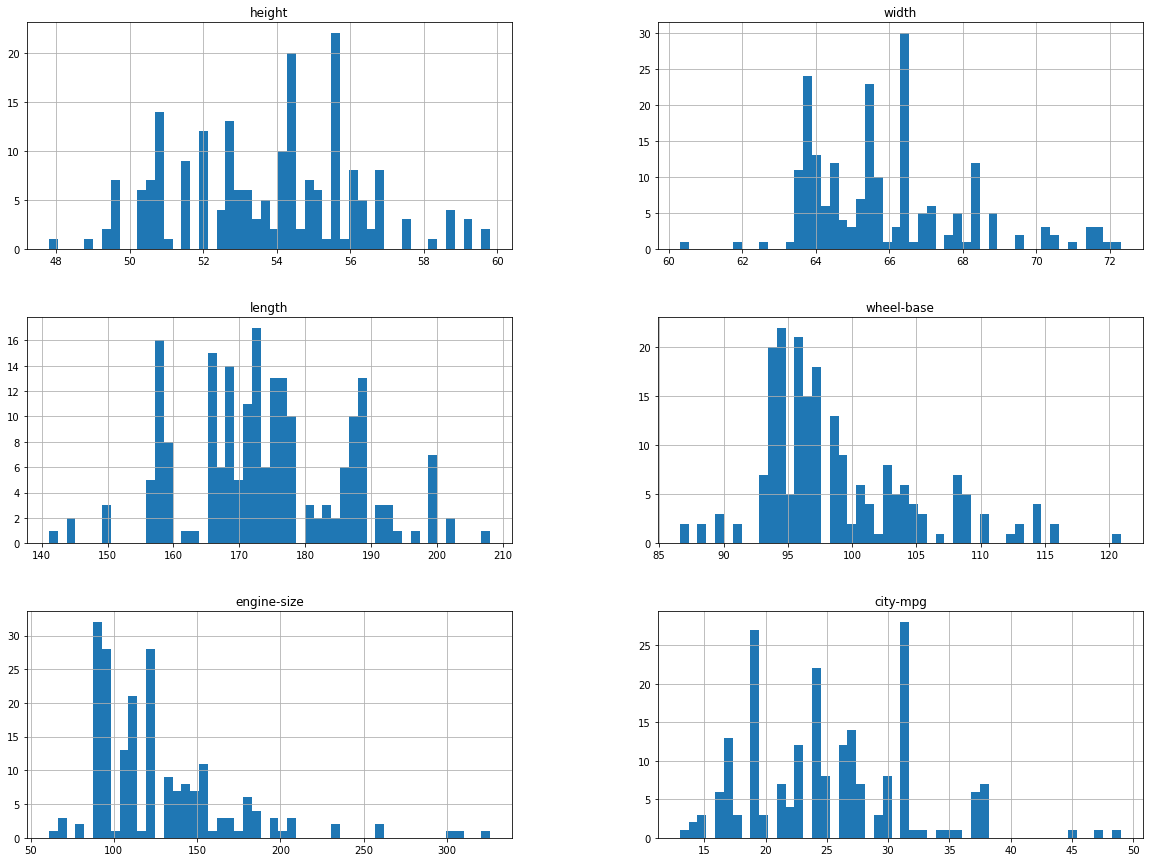

In [9]:
cars.hist(bins=50, figsize=(20, 15))
plt.show()